In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [6]:
gdp_df.shape

(7662, 4)

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [10]:
#Check to see what the column names look like
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [11]:
#Rename the columns to what we want
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})

In [12]:
#Check to make sure it worked!
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [14]:
#Find how many years are represented in the data.
gdp_df['Year'].nunique()

33

In [15]:
#Count the values of each country. To show how many years are represented.
country_count = gdp_df['Country'].value_counts().reset_index()

In [16]:
#Take a peek
country_count

,Country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33
...,...,...
237,Kosovo,15
238,Sint Maarten (Dutch part),14
239,Turks and Caicos Islands,12
240,Somalia,10


In [17]:
#Count the countries that 33 years represented
country_count.loc[country_count['count'] == 33].count()

Country    202
count      202
dtype: int64

In [18]:
#Look at the number of observations per year
gdp_df['Year'].value_counts(ascending= True)

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2022    232
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2007    237
2006    237
2008    238
2009    239
2010    239
2011    240
2012    240
2021    241
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
Name: count, dtype: int64

There are 202 countries that have data for all 33 years.Countries that are missing a lot of data include: Kosovo, Sint Maarten, Turks & Caicos Islands, Somalia, Djbouti. It looks like the number of countries represented has increased over time.

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [21]:
#Using our gdp dataframe, create a new dataframe that only shows the year 2020
year_2020 = gdp_df[gdp_df['Year']== 2020]

In [22]:
#Check it out
year_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


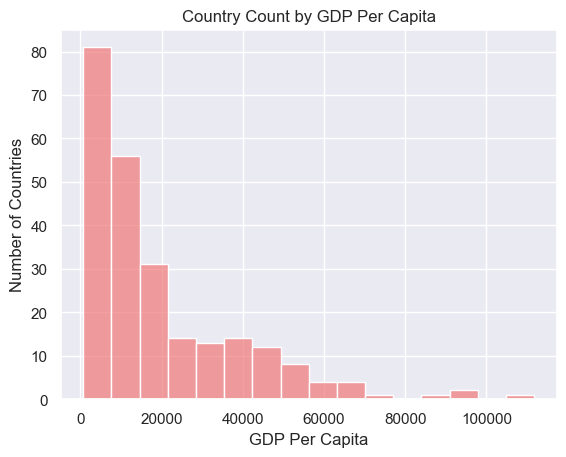

In [23]:
#Histogram
sns.set_theme(style="darkgrid")
sns.histplot(data=year_2020, x='GDP_Per_Capita', color = 'lightcoral')

plt.xlabel('GDP Per Capita') # x-axis name
plt.ylabel('Number of Countries') # y-axis name
plt.title('Country Count by GDP Per Capita') # Add a title
plt.show() # Display the graph

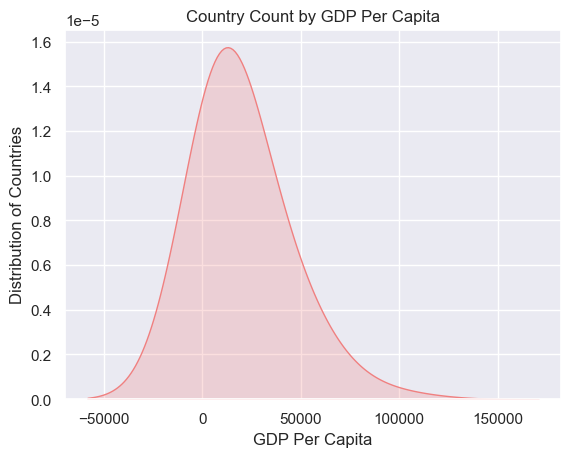

In [24]:
#Density Plot
sns.set_theme(style="darkgrid")
sns.kdeplot(year_2020['GDP_Per_Capita'], fill=True, color="lightcoral", bw_method=1)

plt.xlabel('GDP Per Capita') # x-axis name
plt.ylabel('Distribution of Countries') # y-axis name
plt.title('Country Count by GDP Per Capita') # Add a title
plt.show() # Display the graph

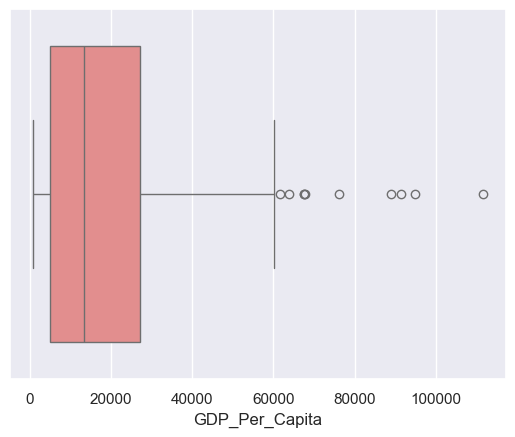

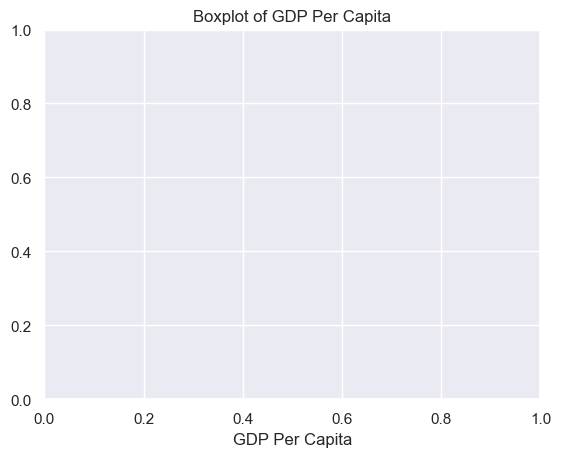

In [25]:
#Boxplot
sns.set_theme(style="darkgrid")
sns.boxplot(x=year_2020['GDP_Per_Capita'], color='lightcoral')
plt.show()

plt.xlabel('GDP Per Capita') # x-axis name
plt.title('Boxplot of GDP Per Capita') # Add a title
plt.show() # Display the graph

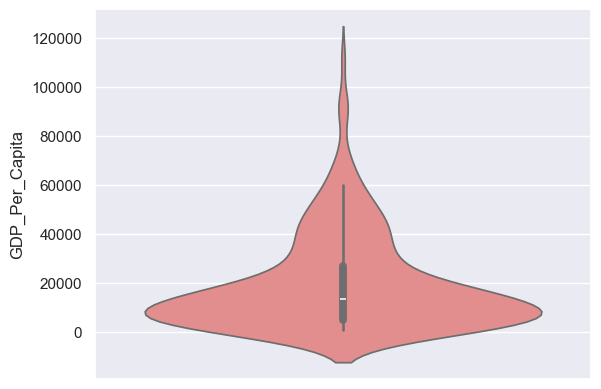

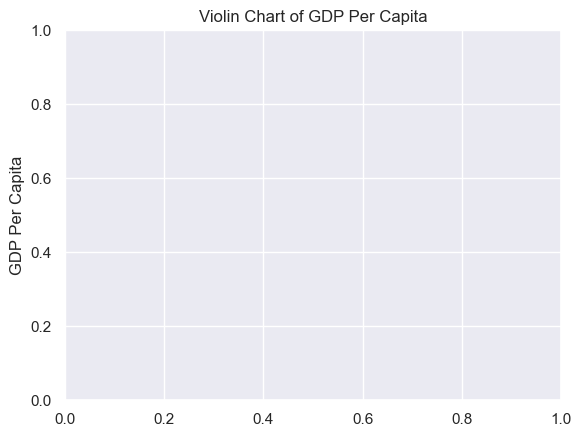

In [26]:
#Violin Chart
sns.set_theme(style="darkgrid")
sns.violinplot(y=year_2020["GDP_Per_Capita"], color='lightcoral')
plt.show()

#plt.xlabel('GDP Per Capita') # x-axis name
plt.ylabel('GDP Per Capita') # y-axis name
plt.title('Violin Chart of GDP Per Capita') # Add a title
plt.show() # Display the graph

9. What was the median GDP per capita value in 2020?

In [28]:
year_2020['GDP_Per_Capita'].median()

13357.997573370474

Answer: 13,358

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [31]:
#Grab only the data that includes only the years needed
gdp_decades = gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


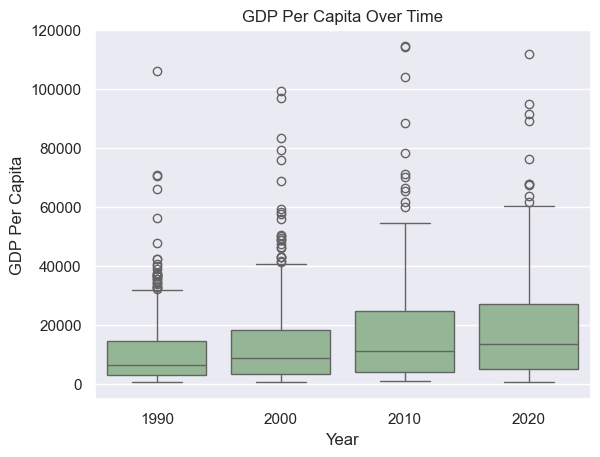

In [32]:
#Boxplot
sns.set_theme(style="darkgrid")
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], color='darkseagreen')

plt.xlabel('Year') # x-axis name
plt.ylabel('GDP Per Capita') # y-axis name
plt.title('GDP Per Capita Over Time') # Add a title
plt.show() # Display the graph

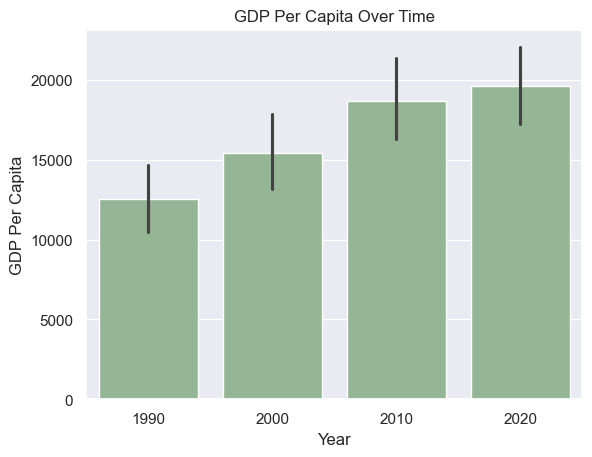

In [33]:
#Set the theme
sns.set_theme(style="darkgrid")
#Barplot
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades, 
    color='darkseagreen')

plt.xlabel('Year') # x-axis name
plt.ylabel('GDP Per Capita') # y-axis name
plt.title('GDP Per Capita Over Time') # Add a title
plt.show() # Display the graph

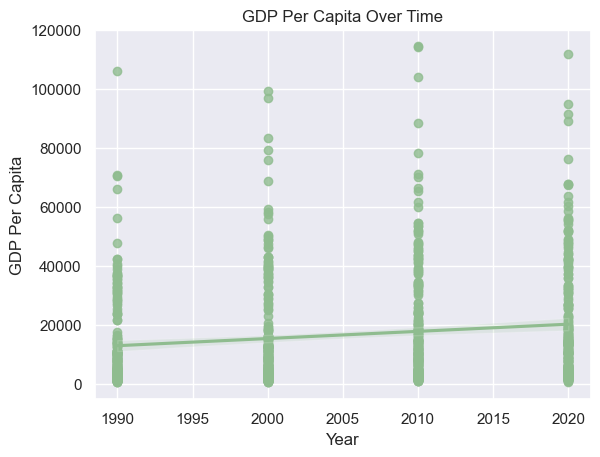

In [34]:
#Scatterplot
sns.set_theme(style="darkgrid")
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], color='darkseagreen')

plt.xlabel('Year') # x-axis name
plt.ylabel('GDP Per Capita') # y-axis name
plt.title('GDP Per Capita Over Time') # Add a title
plt.show() # Display the graph

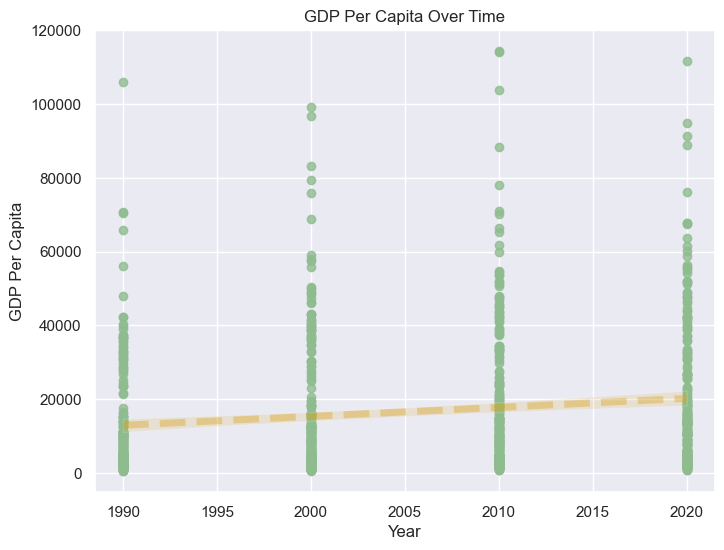

In [35]:
#Scatterplot with regression line
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"], color='darkseagreen',
    line_kws={
        "color": "goldenrod",
        "alpha": 0.4,
        "lw": 5,
        "ls": "--"
    },
    ax=ax
)

plt.xlabel('Year') # x-axis name
plt.ylabel('GDP Per Capita') # y-axis name
plt.title('GDP Per Capita Over Time') # Add a title
plt.show() # Display the graph

plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

In [37]:
first_gdp = gdp_df[gdp_df['GDP_Per_Capita'] > 100000].sort_values('Year')
first_gdp.head()

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098


Answer: United Arab Emirates  1990

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [40]:
#Find the country with the highest GDP in 2020, by filtering the year in the dataset, sorting by gdp in decending order.
highest_gdp = gdp_df[gdp_df['Year'] == 2020].sort_values('GDP_Per_Capita', ascending = False)
highest_gdp

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


In [41]:
#Create a dataframe that filters just Luxembourg data
luxembourg = gdp_df[gdp_df['Country'] == 'Luxembourg']
luxembourg.head()

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558


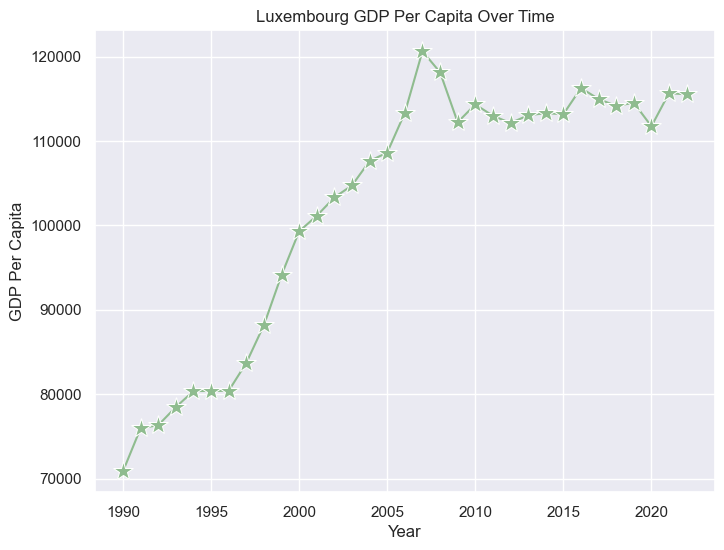

In [42]:
#Create a plot
plt.figure(figsize=(8, 6)) # Width and Height of the chart
sns.lineplot(x='Year',
             y='GDP_Per_Capita', color = 'darkseagreen',
             data=luxembourg,
             marker='*', # Style used to mark the join between 2 points
             markersize=15
            )
plt.xlabel('Year') # x-axis name
plt.ylabel('GDP Per Capita') # y-axis name
plt.title('Luxembourg GDP Per Capita Over Time') # Add a title
plt.show() # Display the graph

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [44]:
#Using the highest GDP dataframe, I can see that Burundi is at the bottom of the list.
burundi = gdp_df[gdp_df['Country'] == 'Burundi']
burundi.head()

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223


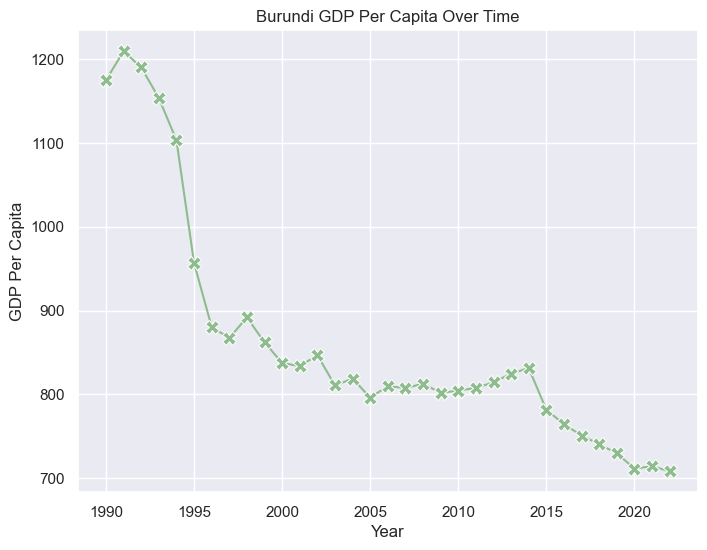

In [45]:
#Scatterplot
plt.figure(figsize=(8, 6)) # Width and Height of the chart
sns.lineplot(x='Year',
             y='GDP_Per_Capita', color = 'darkseagreen',
             data=burundi,
             marker='X', # Style used to mark the join between 2 points
             markersize=10
            )
plt.xlabel('Year') # x-axis name
plt.ylabel('GDP Per Capita') # y-axis name
plt.title('Burundi GDP Per Capita Over Time') # Add a title
plt.show() # Display the graph

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [47]:
#It looks like reading in the csv caused an error, there are too many fields in one of the lines. Using on_bad_lines{‘error’, ‘warn’, ‘skip’} can help solve a problem caused by a line with too many fields 
#internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines='skip')
internet_df = pd.read_csv('../data/internet_use.csv',nrows=6083)
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [48]:
#Check the datatypes
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6083 entries, 0 to 6082
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6083 non-null   object 
 1   Year             6083 non-null   int64  
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 190.2+ KB


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [50]:
internet_df = internet_df.drop('Value Footnotes', axis = 1).rename(columns={'Country or Area':'Country', 'Year':'Year', 'Value':'Internet_Users_Pct'})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


16. Look at the number of observations in this dataset per year. What do you notice?

In [52]:
internet_df.value_counts('Year')

Year
1990    226
2007    217
2008    214
2011    214
2009    214
2002    214
2001    212
2005    212
2006    212
2004    210
2000    210
2010    209
2012    209
2003    208
1999    207
2016    206
2017    205
2014    204
2013    203
2015    203
1998    195
1997    188
2021    186
2020    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64

17. What is the first year to have a non-zero internet users percentage value?

In [54]:
#Filter the data to only include percentage over zero?
non_zero = internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values(['Year','Internet_Users_Pct'])
non_zero

,Country,Year,Internet_Users_Pct
543,Belgium,1990,0.001007
5150,Spain,1990,0.012874
2829,Italy,1990,0.017545
2892,Japan,1990,0.020294
3054,Korea (Republic of),1990,0.023265
...,...,...,...
2159,Germany,2023,92.476400
5266,Sweden,2023,95.703300
1537,Denmark,2023,98.775600
3323,Luxembourg,2023,99.347900


Answer: 1990

 18. How does the distribution of internet users percent differ for 2000 and 2014?

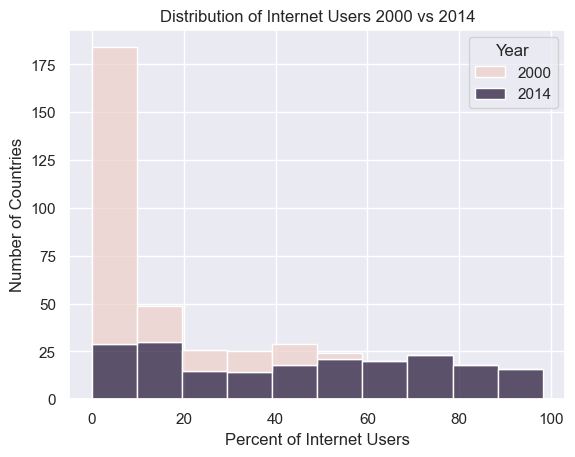

In [130]:
#Create dataframe that is just for the years 2000 & 2014
zenon_year = internet_df[(internet_df['Year']==2000) | (internet_df['Year']==2014)]
sns.histplot(data=zenon_year, x="Internet_Users_Pct", hue="Year", multiple="stack")

plt.xlabel('Percent of Internet Users') # x-axis name
plt.ylabel('Number of Countries') # y-axis name
plt.title('Distribution of Internet Users 2000 vs 2014') # Add a title
plt.show() # Display the graph

19. For how many countries was the percentage of internet users below 5% in 2014?

In [59]:
year_2014 = internet_df[internet_df['Year'] == 2014]
below_five = year_2014[internet_df['Internet_Users_Pct']< 5]
below_five.count()

/var/folders/pp/vy1cm1td64l94kkzc518f7jh0000gq/T/ipykernel_26779/878210801.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  below_five = year_2014[internet_df['Internet_Users_Pct']< 5]


Country               10
Year                  10
Internet_Users_Pct    10
dtype: int64

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly. 
https://stackoverflow.com/questions/53645882/pandas-merging-101

In [61]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df,
                              on = ['Country', 'Year'],
                               how = 'outer')
                               
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1280.463171,0.004561
3,Afghanistan,2003,1292.333437,0.087891
4,Afghanistan,2004,1260.060581,0.105809
...,...,...,...,...
9107,Zimbabwe,2018,2399.621551,25.000000
9108,Zimbabwe,2019,2203.396810,26.588300
9109,Zimbabwe,2020,1990.319419,29.298600
9110,Zimbabwe,2021,2115.144555,32.461600


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [63]:
highest_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
highest_2014.sort_values('Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3820,Iceland,2014,50450.741612,98.1580
2780,Falkland (Malvinas) Islands,2014,NaN,97.6000
794,Bermuda,2014,77361.104881,96.8000
6243,Norway,2014,62838.515727,96.3005
2100,Denmark,2014,52048.335493,95.9935
...,...,...,...,...
8450,Turks and Caicos Islands,2014,24661.145053,NaN
8516,TÃ¼rkiye,2014,24600.518215,NaN
8746,Upper middle income,2014,14063.487284,NaN
8978,West Bank and Gaza,2014,5967.073437,NaN


In [136]:
#three_countries = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland','Falkland (Malvinas) Islands','Norway'])]
#three_countries

#The Falkland (Malvinas) Islands don't have any GDP_Per_Capita data, so I'm going to take the next country on the list

three_countries = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Iceland','Bermuda','Norway'])]
three_countries

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
770,Bermuda,1990,65961.406278,0.0000
771,Bermuda,1991,63958.896254,NaN
772,Bermuda,1992,64385.407410,NaN
773,Bermuda,1993,65967.850014,NaN
774,Bermuda,1994,65904.720421,NaN
...,...,...,...,...
6247,Norway,2018,64696.490887,96.4917
6248,Norway,2019,64983.354208,98.0000
6249,Norway,2020,63776.160965,94.6076
6250,Norway,2021,65909.003030,99.0000


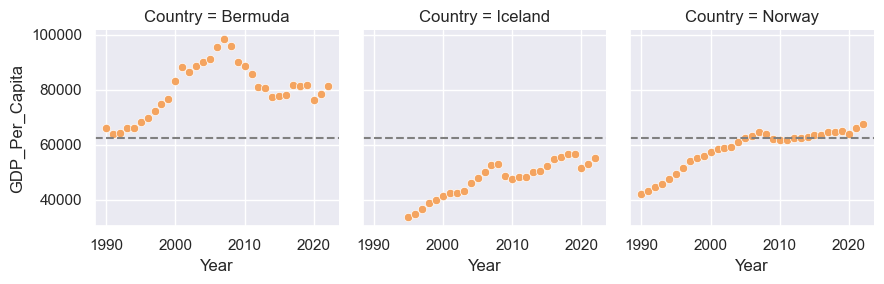

In [150]:
#FacetGrid
g = sns.FacetGrid(three_countries, col="Country", margin_titles=True)
g.map_dataframe(sns.scatterplot, x="Year", y="GDP_Per_Capita", color='sandybrown')
g.refline(y=three_countries["GDP_Per_Capita"].median())

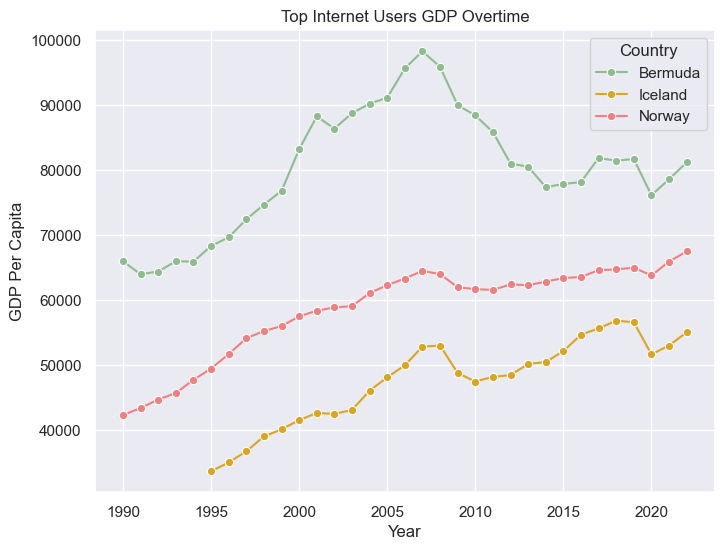

In [140]:
#Lineplot
plt.figure(figsize=(8, 6)) # Width and Height of the chart
sns.lineplot(x='Year',
             y='GDP_Per_Capita',
             hue='Country', # Create 2 line plots according to labels in 'z'
             data=three_countries,
             marker='o', # Style used to mark the join between 2 points
             palette={'Norway':'lightcoral',
                      'Bermuda':'darkseagreen',
                      'Iceland':'goldenrod'
                      }, # Colors of the lines
            )
plt.xlabel('Year') # x-axis name
plt.ylabel('GDP Per Capita') # y-axis name
plt.title('Top Internet Users GDP Overtime') # Add a title
plt.show() # Display the graph

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [68]:
#Just grab the year 2014
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2014,2144.449634,7.0000
46,Africa Eastern and Southern,2014,3642.875373,NaN
79,Africa Western and Central,2014,4146.994622,NaN
112,Albania,2014,11586.817446,54.3000
145,Algeria,2014,11561.259795,29.5000
...,...,...,...,...
8978,West Bank and Gaza,2014,5967.073437,NaN
9011,World,2014,15120.730322,NaN
9039,Yemen,2014,NaN,22.5500
9070,Zambia,2014,3375.941270,6.5000


23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

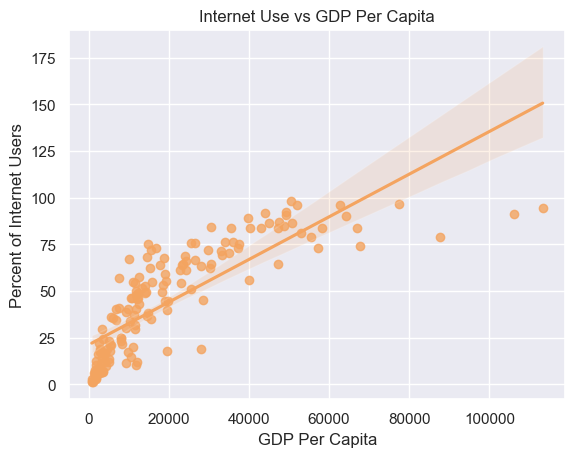

In [156]:
# draw regplot
sns.regplot(x = "GDP_Per_Capita",
            y = "Internet_Users_Pct",
            data = gdp_and_internet_use_2014, color = 'sandybrown',
            dropna = True)
plt.xlabel('GDP Per Capita') # x-axis name
plt.ylabel('Percent of Internet Users') # y-axis name
plt.title('Internet Use vs GDP Per Capita') # Add a title
plt.show() # Display the graph

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [72]:
gdp_per_capita_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_per_capita_2014['GDP_group'] = pd.qcut(gdp_per_capita_2014['GDP_Per_Capita'], q=3, labels=["Low", "Medium", "High"])
gdp_per_capita_2014.head()

/var/folders/pp/vy1cm1td64l94kkzc518f7jh0000gq/T/ipykernel_26779/759852984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_per_capita_2014['GDP_group'] = pd.qcut(gdp_per_capita_2014['GDP_Per_Capita'], q=3, labels=["Low", "Medium", "High"])


,Country,Year,GDP_Per_Capita,GDP_group
7,Afghanistan,2014,2144.449634,Low
28,Africa Eastern and Southern,2014,3642.875373,Low
61,Africa Western and Central,2014,4146.994622,Low
94,Albania,2014,11586.817446,Medium
127,Algeria,2014,11561.259795,Medium


25. **Stretch Question: How does the median internet users percentage compare for the three gdp groups?

In [74]:
gdp_per_capita_2014.groupby(by='GDP_group', dropna=False).median('GDP_Per_Capita')

/var/folders/pp/vy1cm1td64l94kkzc518f7jh0000gq/T/ipykernel_26779/1876882929.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_per_capita_2014.groupby(by='GDP_group', dropna=False).median('GDP_Per_Capita')


,Year,GDP_Per_Capita
GDP_group,,
Low,2014.0,3378.364591
Medium,2014.0,12164.228037
High,2014.0,37454.808489
